In [22]:
# Step 0: imports & settings
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import joblib            # to save the trained model

# plotting settings
%matplotlib inline
plt.rcParams['figure.figsize'] = (12,6)
sns.set_style("whitegrid")
RANDOM_STATE = 42


In [23]:
# Step 1: Import libraries
import pandas as pd
from tkinter import Tk
from tkinter.filedialog import askopenfilename

# Step 2: Open file dialog to choose Excel file from your local system
Tk().withdraw()  # hides the small Tkinter window
filename = askopenfilename(filetypes=[("Excel files", "*.xlsx *.xls")])

# Step 3: Load the selected file into a DataFrame
df = pd.read_excel(filename)

# Step 4: Print basic info
print("Loaded file:", filename)
print("Shape:", df.shape)
df.head()


Loaded file: C:/Users/suhan/Downloads/final dtast uk.xlsx
Shape: (24, 36)


,YEAR,GSDP,TOTAL EXPENDITURE,REVENUE EXPENDITURE,CAPITAL EXPENDITURE,CAPITAL OUTLAY,DEBT REPAYMENT,DEBT SERVICING,COMMITTED LIABILITIES,SALARIES,...,BORROWINGS(GROSS),OTHER RECEIPTS,TOTAL CAPITAL RECEIPTS,TOTAL RECEIPTS,REVENUE SURPLUS/DEFICIT,DEFICIT(%GSDP),FISCAL DEFICIT,FISCAL DEFICIT(%),PRIMARY DEFICIT,PRIMARY DEFICIT(%)
0,2001,57949,7620,6843,1495,949,662,1297,1448,6227,...,1647,39768,1751,17408,-1752,0.0216,2858,0.0546,1605,0.0301
1,2002,62992,8486,7491,1716,1064,772,1391,1650,6712,...,1878,29201,1991,18361,-1839,0.0205,3040,0.0531,1691,0.0291
2,2003,68473,9452,8200,1970,1193,900,1493,1879,7235,...,2141,21442,2265,19367,-1925,0.0194,3234,0.0518,1782,0.0281
3,2004,74432,10527,8976,2262,1337,1048,1601,2141,7799,...,2442,15744,2576,20427,-2010,0.0184,3440,0.0504,1877,0.0271
4,2005,80909,11725,9826,2598,1499,1221,1718,2438,8406,...,2784,11561,2930,21545,-2092,0.0175,3660,0.0491,1978,0.0262


In [24]:
# Step 2: Inspect columns and data types
print("Columns:", list(df.columns))
print("\nData types:\n", df.dtypes)
print("\nDataset shape (rows, cols):", df.shape)
print(df.columns)



Columns: ['YEAR', 'GSDP', 'TOTAL EXPENDITURE', 'REVENUE EXPENDITURE', 'CAPITAL EXPENDITURE', 'CAPITAL OUTLAY', 'DEBT REPAYMENT', 'DEBT SERVICING', 'COMMITTED LIABILITIES', 'SALARIES', 'PENSIONS', 'INTERST PAYMENTS', 'EDUCATION', 'AGRICULTURE', 'RURAL DEVELOPMENT', 'HEALTH & FAMILY WELFARE', 'SOCIAL SECURITY & WELFARE', 'POLICE', 'WATER SUPPLY', 'TRANSPORT', 'IRRIGATION AND FLOOD CONTROL', 'TOTAL REVENUE RECIEPTS', "STATE'S OWN TAX  REVENUE", 'STATES OWN NON TAX REVENUE', "STATE'S SHARE IN CENTRAL TAXES", 'GRANTS IN AID FROM CENTRE', 'BORROWINGS(GROSS)', 'OTHER RECEIPTS', 'TOTAL CAPITAL RECEIPTS', 'TOTAL RECEIPTS', 'REVENUE SURPLUS/DEFICIT', 'DEFICIT(%GSDP)', 'FISCAL DEFICIT', 'FISCAL DEFICIT(%)', 'PRIMARY DEFICIT', 'PRIMARY DEFICIT(%)']

Data types:
 YEAR                                int64
GSDP                                int64
TOTAL EXPENDITURE                   int64
REVENUE EXPENDITURE                 int64
CAPITAL EXPENDITURE                 int64
CAPITAL OUTLAY               

In [25]:
# Step 2: inspect
print("Columns:\n", list(df.columns))
print("\nData types:\n", df.dtypes)
print("\nBasic stats (numeric):")
display(df.describe().T)




# Step 3: missing value report
missing = df.isnull().sum().sort_values(ascending=False)
print("Missing values per column:\n", missing[missing>0])

# If you want to *fill*, we will forward-fill then median-fill as a safe option:
# (Only run filling if you are OK with this automatic simple approach.)
fill_option = True   # set to False if you only want to report and not fill

if fill_option:
    numeric_cols = df.select_dtypes(include=[np.number]).columns.tolist()
    print("\nNumeric columns detected:", numeric_cols)
    # forward fill then median
    df[numeric_cols] = df[numeric_cols].ffill().fillna(df[numeric_cols].median())
    print("\nAfter fill, missing counts:\n", df.isnull().sum().sum())


Columns:
 ['YEAR', 'GSDP', 'TOTAL EXPENDITURE', 'REVENUE EXPENDITURE', 'CAPITAL EXPENDITURE', 'CAPITAL OUTLAY', 'DEBT REPAYMENT', 'DEBT SERVICING', 'COMMITTED LIABILITIES', 'SALARIES', 'PENSIONS', 'INTERST PAYMENTS', 'EDUCATION', 'AGRICULTURE', 'RURAL DEVELOPMENT', 'HEALTH & FAMILY WELFARE', 'SOCIAL SECURITY & WELFARE', 'POLICE', 'WATER SUPPLY', 'TRANSPORT', 'IRRIGATION AND FLOOD CONTROL', 'TOTAL REVENUE RECIEPTS', "STATE'S OWN TAX  REVENUE", 'STATES OWN NON TAX REVENUE', "STATE'S SHARE IN CENTRAL TAXES", 'GRANTS IN AID FROM CENTRE', 'BORROWINGS(GROSS)', 'OTHER RECEIPTS', 'TOTAL CAPITAL RECEIPTS', 'TOTAL RECEIPTS', 'REVENUE SURPLUS/DEFICIT', 'DEFICIT(%GSDP)', 'FISCAL DEFICIT', 'FISCAL DEFICIT(%)', 'PRIMARY DEFICIT', 'PRIMARY DEFICIT(%)']

Data types:
 YEAR                                int64
GSDP                                int64
TOTAL EXPENDITURE                   int64
REVENUE EXPENDITURE                 int64
CAPITAL EXPENDITURE                 int64
CAPITAL OUTLAY              

,count,mean,std,min,25%,50%,75%,max
YEAR,24.0,2012.708333,7.369025,2001.0000,2006.750000,2012.50000,2018.250000,2025.0000
GSDP,24.0,177214.583333,103634.677002,57949.0000,93690.500000,151413.50000,239175.250000,429308.0000
TOTAL EXPENDITURE,24.0,33482.250000,24997.774409,7620.0000,14173.500000,26347.00000,44469.500000,101175.0000
REVENUE EXPENDITURE,24.0,24285.833333,15954.983331,6843.0000,11519.500000,19380.00000,33326.000000,59955.0000
CAPITAL EXPENDITURE,24.0,8769.458333,8192.969069,1495.0000,3314.500000,7342.50000,11909.000000,41220.0000
CAPITAL OUTLAY,24.0,4724.416667,3901.205209,949.0000,1834.000000,3541.00000,5539.000000,14763.0000
DEBT REPAYMENT,24.0,5028.666667,5937.236736,662.0000,1599.250000,3342.50000,5585.000000,26006.0000
DEBT SERVICING,24.0,6691.500000,8072.342190,1297.0000,1942.500000,2909.00000,9620.500000,32996.0000
COMMITTED LIABILITIES,24.0,12471.958333,12055.863702,1448.0000,3067.500000,6490.50000,23108.250000,37678.0000
SALARIES,24.0,13042.000000,4310.087853,6227.0000,9589.750000,12903.00000,16445.000000,20770.0000


Missing values per column:
 Series([], dtype: int64)

Numeric columns detected: ['YEAR', 'GSDP', 'TOTAL EXPENDITURE', 'REVENUE EXPENDITURE', 'CAPITAL EXPENDITURE', 'CAPITAL OUTLAY', 'DEBT REPAYMENT', 'DEBT SERVICING', 'COMMITTED LIABILITIES', 'SALARIES', 'PENSIONS', 'INTERST PAYMENTS', 'EDUCATION', 'AGRICULTURE', 'RURAL DEVELOPMENT', 'HEALTH & FAMILY WELFARE', 'SOCIAL SECURITY & WELFARE', 'POLICE', 'WATER SUPPLY', 'TRANSPORT', 'IRRIGATION AND FLOOD CONTROL', 'TOTAL REVENUE RECIEPTS', "STATE'S OWN TAX  REVENUE", 'STATES OWN NON TAX REVENUE', "STATE'S SHARE IN CENTRAL TAXES", 'GRANTS IN AID FROM CENTRE', 'BORROWINGS(GROSS)', 'OTHER RECEIPTS', 'TOTAL CAPITAL RECEIPTS', 'TOTAL RECEIPTS', 'REVENUE SURPLUS/DEFICIT', 'DEFICIT(%GSDP)', 'FISCAL DEFICIT', 'FISCAL DEFICIT(%)', 'PRIMARY DEFICIT', 'PRIMARY DEFICIT(%)']

After fill, missing counts:
 0


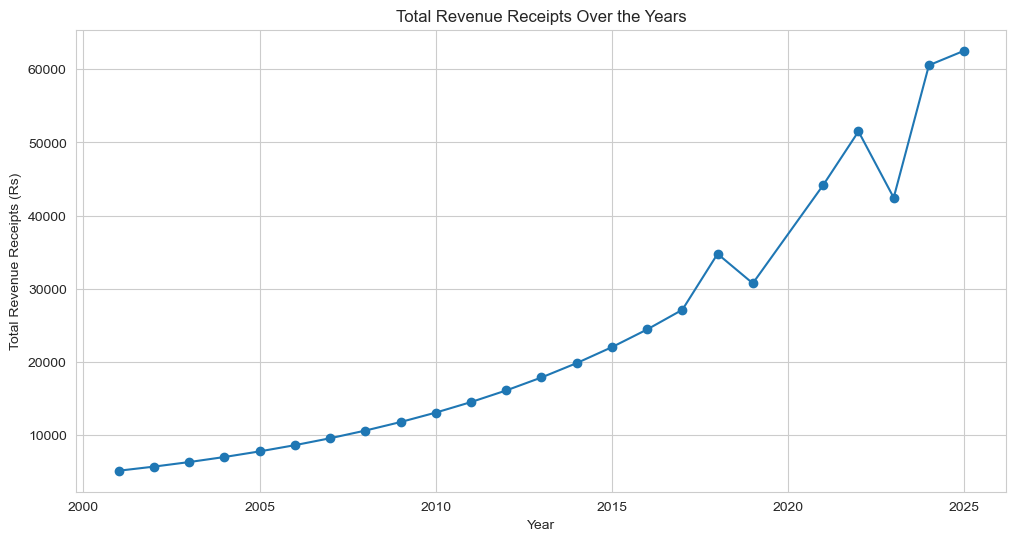

In [26]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12,6))
plt.plot(df['YEAR'], df['TOTAL REVENUE RECIEPTS'], marker='o')
plt.title('Total Revenue Receipts Over the Years')
plt.xlabel('Year')
plt.ylabel('Total Revenue Receipts (Rs)')
plt.grid(True)
plt.show()


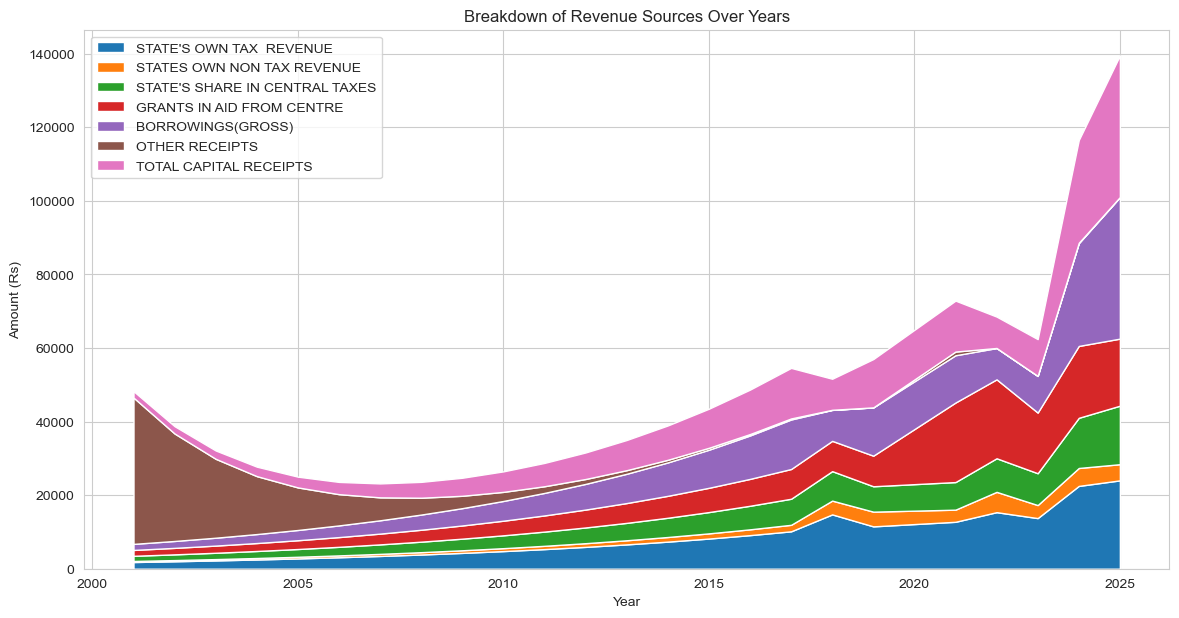

In [27]:
rev_cols = [
    "STATE'S OWN TAX  REVENUE",
    "STATES OWN NON TAX REVENUE",
    "STATE'S SHARE IN CENTRAL TAXES",
    "GRANTS IN AID FROM CENTRE",
    "BORROWINGS(GROSS)",
    "OTHER RECEIPTS",
    "TOTAL CAPITAL RECEIPTS"
]

plt.figure(figsize=(14,7))
plt.stackplot(df['YEAR'], [df[col] for col in rev_cols], labels=rev_cols)
plt.title('Breakdown of Revenue Sources Over Years')
plt.xlabel('Year')
plt.ylabel('Amount (Rs)')
plt.legend(loc='upper left')
plt.show()


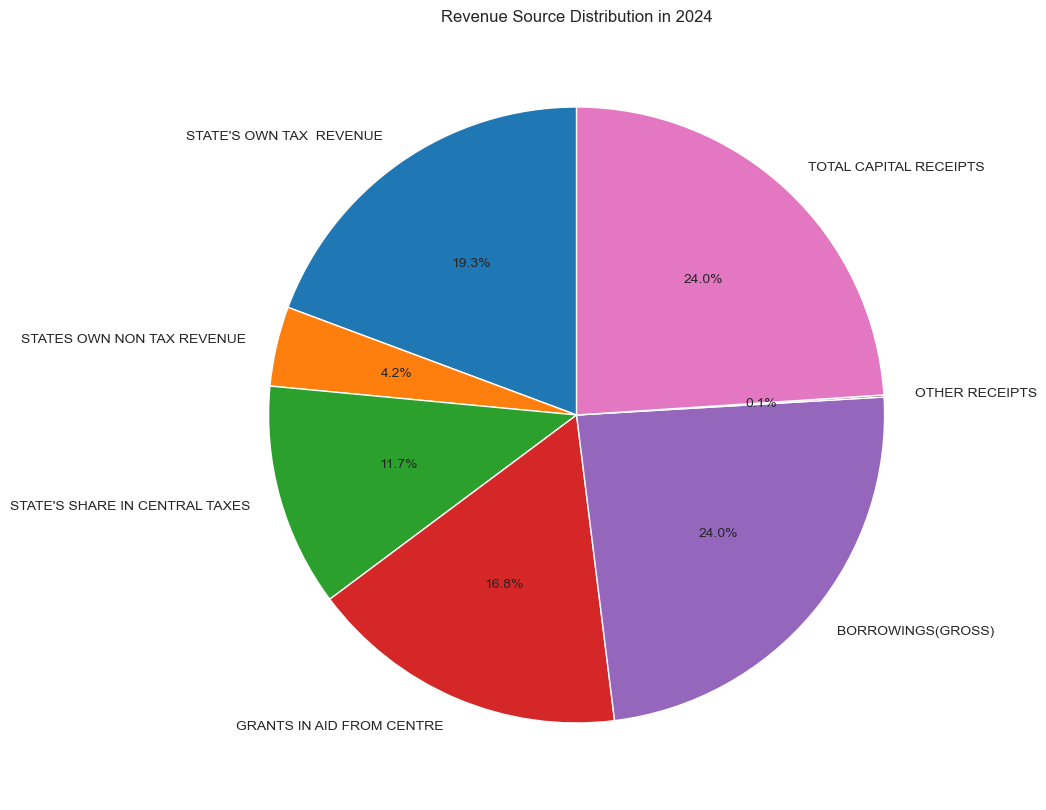

In [28]:
year = 2024
data_year = df[df['YEAR'] == year]

pie_values = data_year[rev_cols].iloc[0]
pie_labels = rev_cols

plt.figure(figsize=(10,10))
plt.pie(pie_values, labels=pie_labels, autopct='%1.1f%%', startangle=90)
plt.title(f'Revenue Source Distribution in {year}')
plt.show()


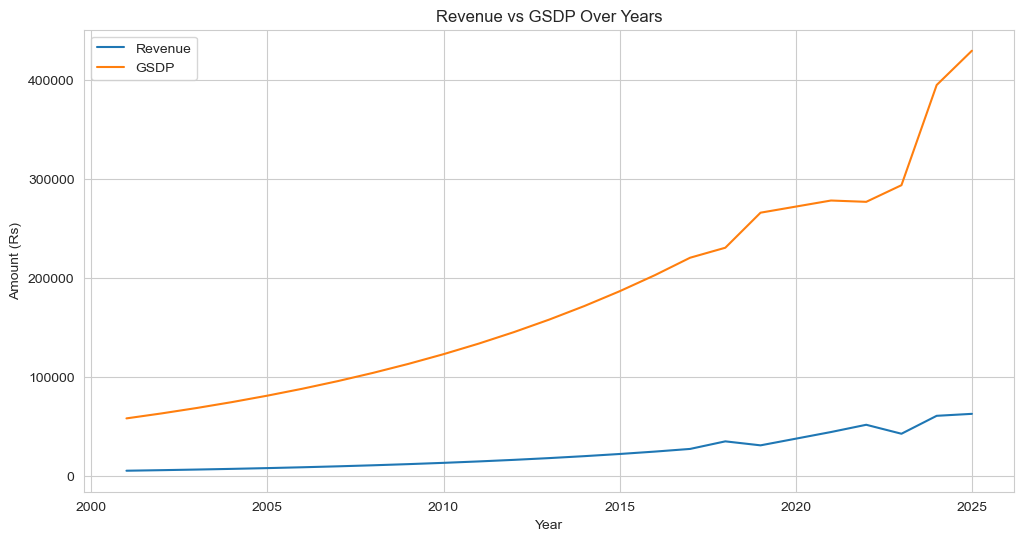

In [30]:
plt.figure(figsize=(12,6))
plt.plot(df['YEAR'], df['TOTAL REVENUE RECIEPTS'], label="Revenue")
plt.plot(df['YEAR'], df['GSDP'], label="GSDP")
plt.legend()
plt.title("Revenue vs GSDP Over Years")
plt.xlabel("Year")
plt.ylabel("Amount (Rs)")
plt.show()


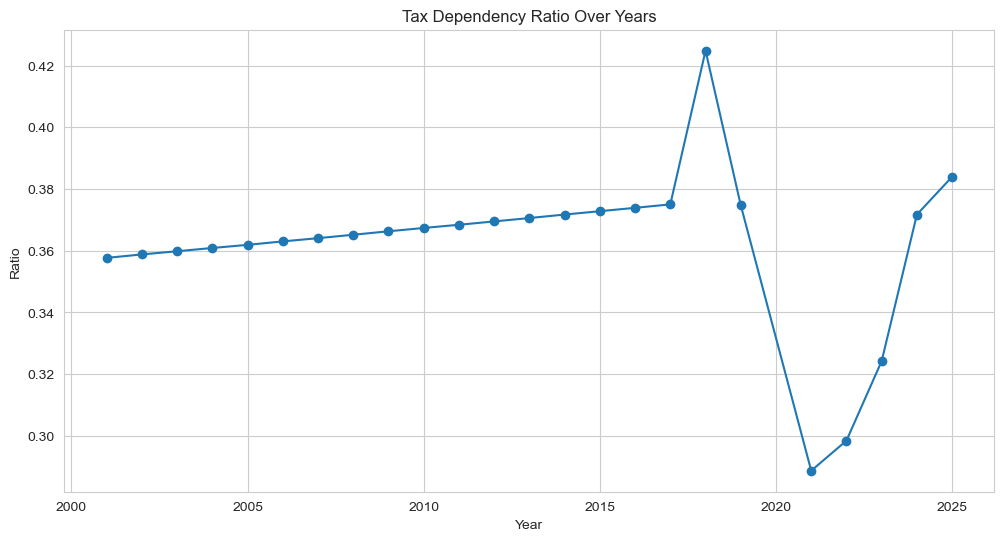

In [31]:
df['TAX_DEPENDENCY'] = df["STATE'S OWN TAX  REVENUE"] / df['TOTAL REVENUE RECIEPTS']
plt.plot(df['YEAR'], df['TAX_DEPENDENCY'], marker='o')
plt.title("Tax Dependency Ratio Over Years")
plt.xlabel("Year")
plt.ylabel("Ratio")
plt.grid(True)
plt.show()




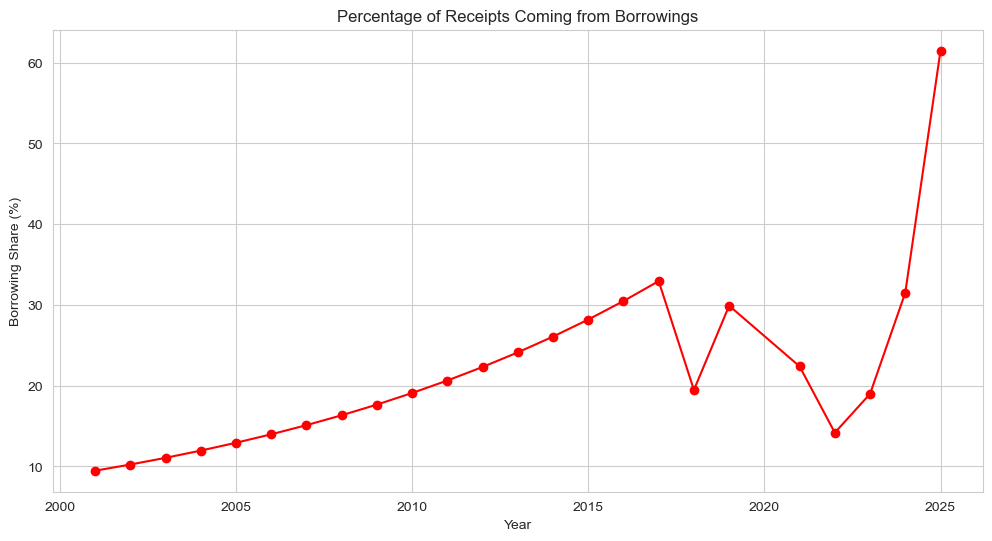

In [32]:
df['BORROWING_SHARE_%'] = (df["BORROWINGS(GROSS)"] / df['TOTAL RECEIPTS']) * 100

plt.plot(df['YEAR'], df['BORROWING_SHARE_%'], marker='o', color='red')
plt.title("Percentage of Receipts Coming from Borrowings")
plt.xlabel("Year")
plt.ylabel("Borrowing Share (%)")
plt.grid(True)
plt.show()


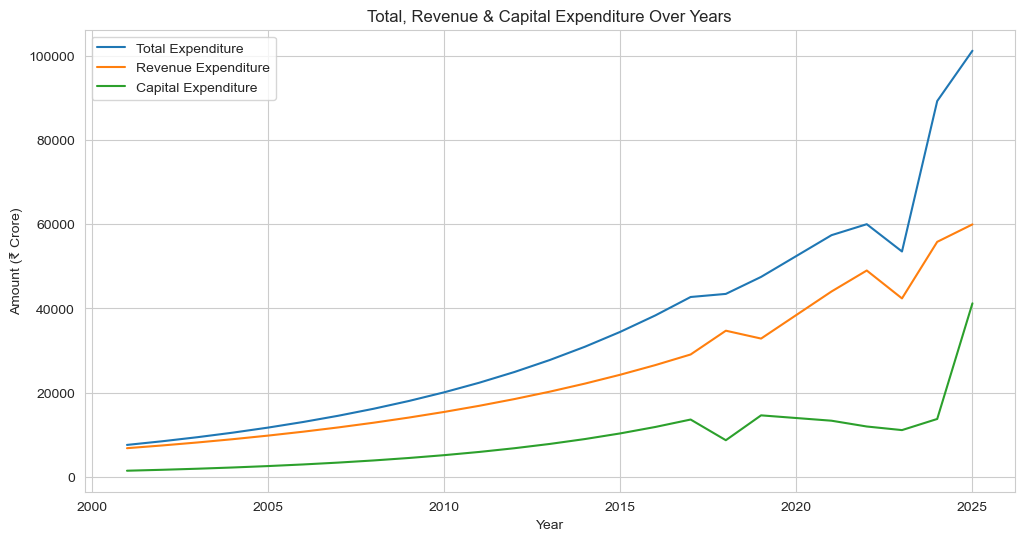

In [33]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12,6))
plt.plot(df['YEAR'], df['TOTAL EXPENDITURE'], label='Total Expenditure')
plt.plot(df['YEAR'], df['REVENUE EXPENDITURE'], label='Revenue Expenditure')
plt.plot(df['YEAR'], df['CAPITAL EXPENDITURE'], label='Capital Expenditure')

plt.xlabel("Year")
plt.ylabel("Amount (₹ Crore)")
plt.title("Total, Revenue & Capital Expenditure Over Years")
plt.legend()
plt.grid(True)
plt.show()


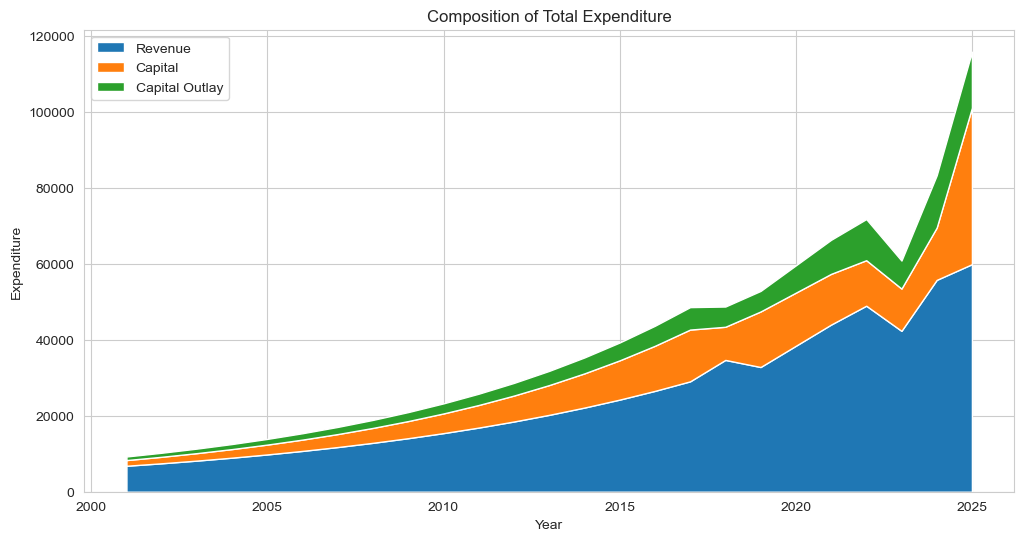

In [34]:
plt.figure(figsize=(12,6))
plt.stackplot(df['YEAR'],
              df['REVENUE EXPENDITURE'],
              df['CAPITAL EXPENDITURE'],
              df['CAPITAL OUTLAY'],
              labels=['Revenue', 'Capital', 'Capital Outlay'])

plt.xlabel("Year")
plt.ylabel("Expenditure")
plt.title("Composition of Total Expenditure")
plt.legend(loc='upper left')
plt.show()


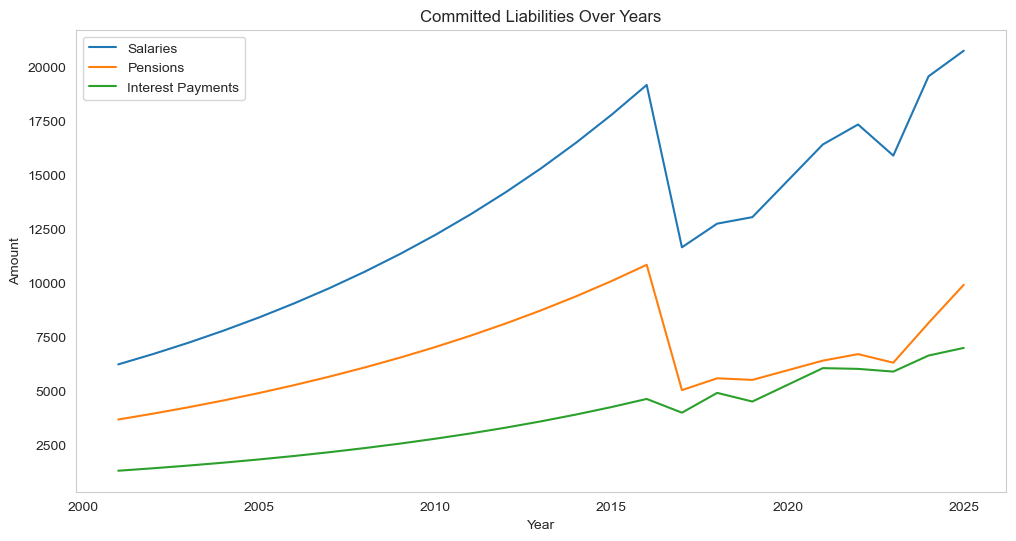

In [35]:
plt.figure(figsize=(12,6))
plt.plot(df['YEAR'], df['SALARIES'], label='Salaries')
plt.plot(df['YEAR'], df['PENSIONS'], label='Pensions')
plt.plot(df['YEAR'], df['INTERST PAYMENTS'], label='Interest Payments')

plt.xlabel("Year")
plt.ylabel("Amount")
plt.title("Committed Liabilities Over Years")
plt.legend()
plt.grid()
plt.show()


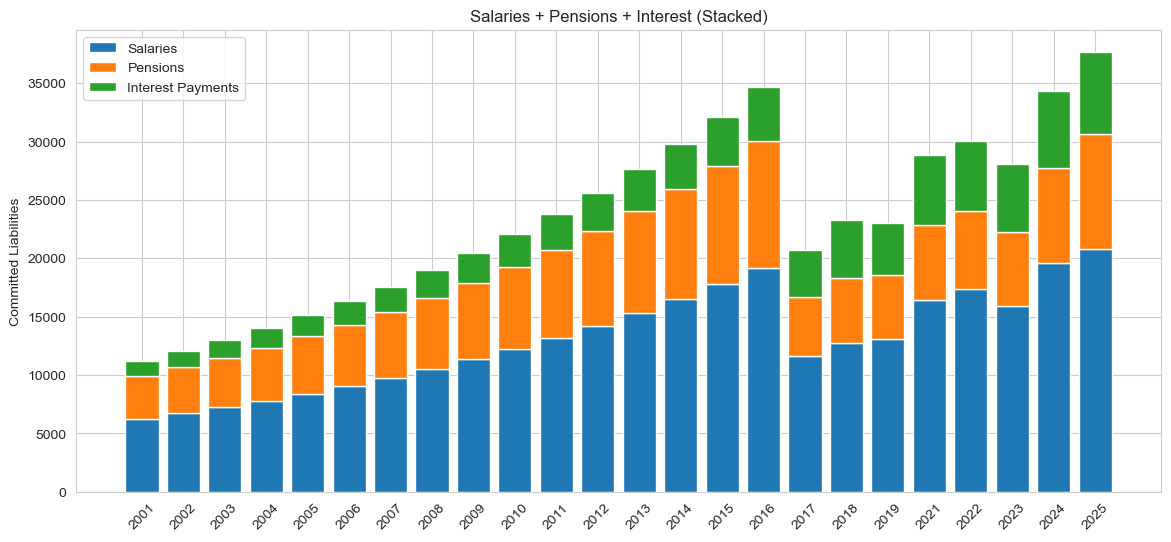

In [36]:
import numpy as np

plt.figure(figsize=(14,6))
bar_width = 0.6
years = df['YEAR']
indices = np.arange(len(years))

plt.bar(indices, df['SALARIES'], label='Salaries')
plt.bar(indices, df['PENSIONS'], bottom=df['SALARIES'], label='Pensions')
plt.bar(indices, df['INTERST PAYMENTS'], 
        bottom=df['SALARIES'] + df['PENSIONS'], label='Interest Payments')

plt.xticks(indices, years, rotation=45)
plt.ylabel("Committed Liabilities")
plt.title("Salaries + Pensions + Interest (Stacked)")
plt.legend()
plt.show()


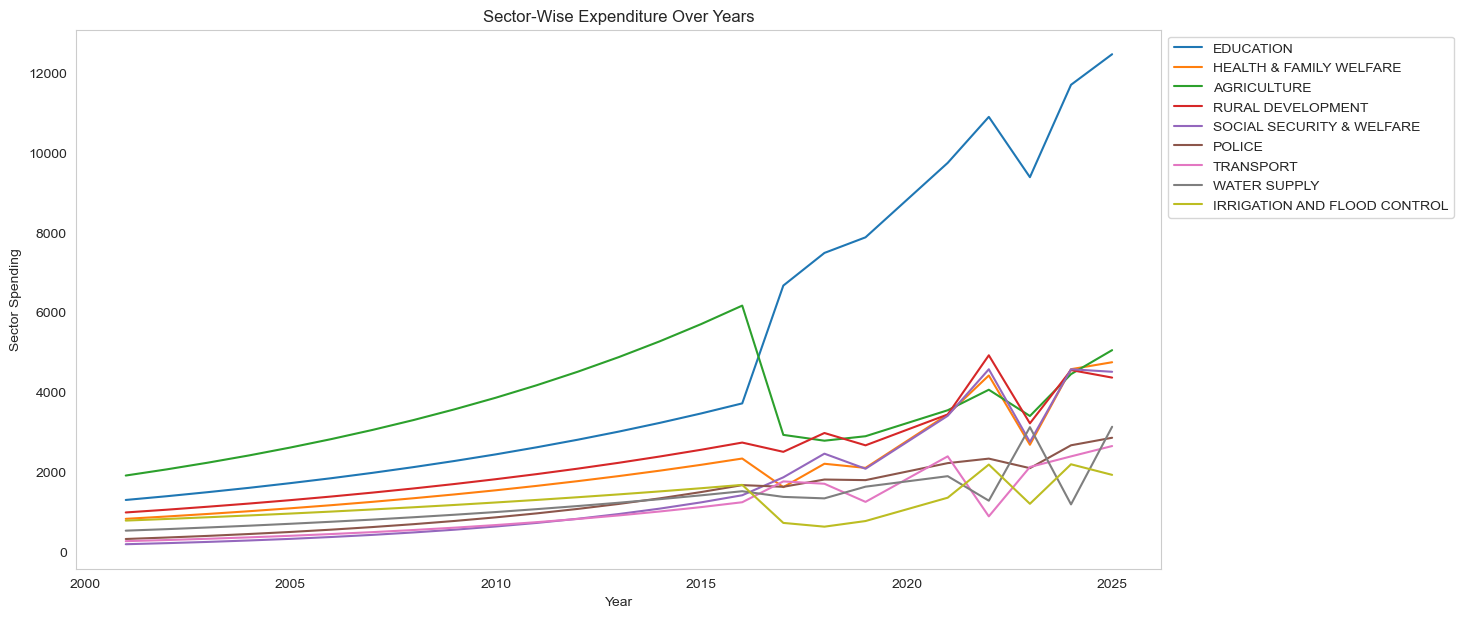

In [37]:
sectors = ['EDUCATION','HEALTH & FAMILY WELFARE','AGRICULTURE',
           'RURAL DEVELOPMENT','SOCIAL SECURITY & WELFARE','POLICE',
           'TRANSPORT','WATER SUPPLY','IRRIGATION AND FLOOD CONTROL']

plt.figure(figsize=(14,7))

for col in sectors:
    plt.plot(df['YEAR'], df[col], label=col)

plt.xlabel("Year")
plt.ylabel("Sector Spending")
plt.title("Sector-Wise Expenditure Over Years")
plt.legend(loc='upper left', bbox_to_anchor=(1,1))
plt.grid()
plt.show()


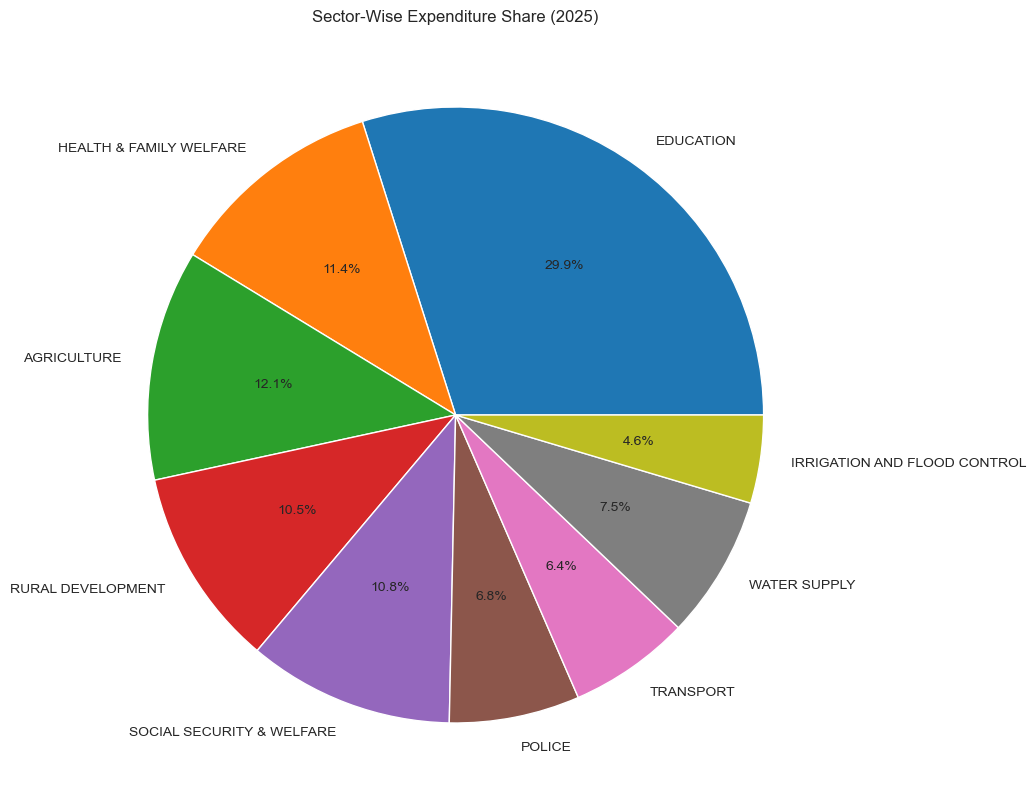

In [38]:
latest_year = df['YEAR'].max()
row = df[df['YEAR'] == latest_year].iloc[0]

labels = sectors
values = [row[col] for col in sectors]

plt.figure(figsize=(10,10))
plt.pie(values, labels=labels, autopct='%1.1f%%')
plt.title(f"Sector-Wise Expenditure Share ({latest_year})")
plt.show()


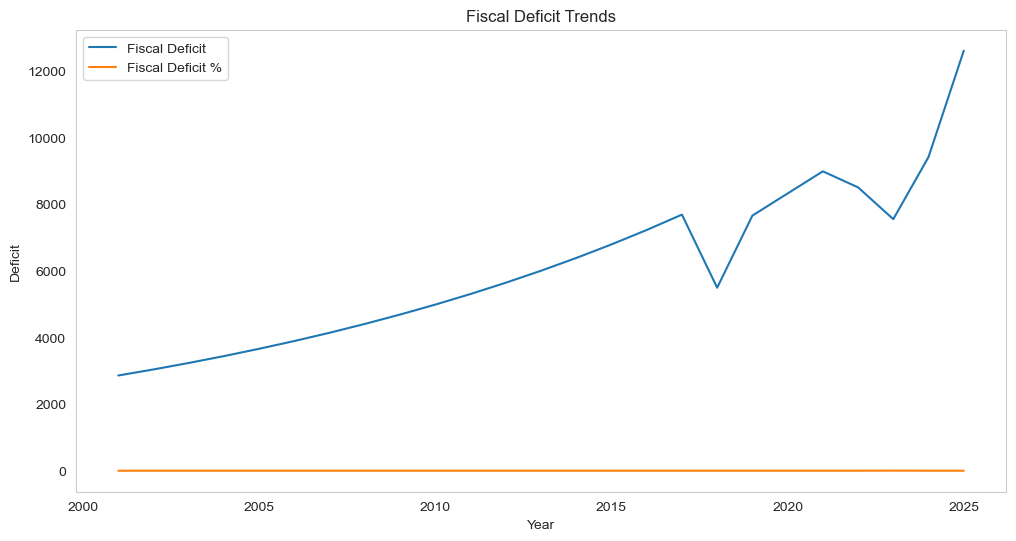

In [39]:
plt.figure(figsize=(12,6))
plt.plot(df['YEAR'], df['FISCAL DEFICIT'], label='Fiscal Deficit')
plt.plot(df['YEAR'], df['FISCAL DEFICIT(%)'], label='Fiscal Deficit %')

plt.xlabel("Year")
plt.ylabel("Deficit")
plt.title("Fiscal Deficit Trends")
plt.legend()
plt.grid()
plt.show()


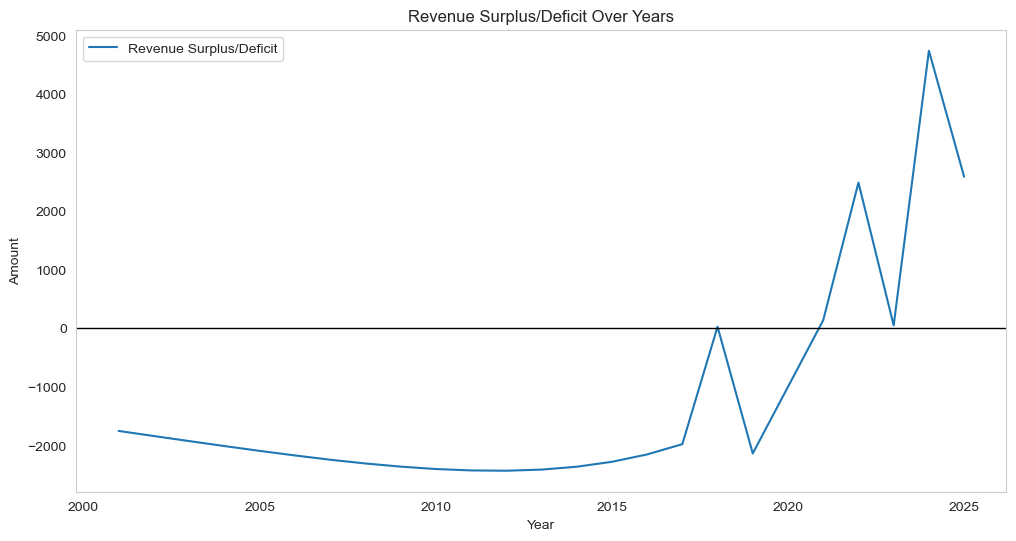

In [40]:
plt.figure(figsize=(12,6))
plt.plot(df['YEAR'], df['REVENUE SURPLUS/DEFICIT'], label='Revenue Surplus/Deficit')

plt.axhline(0, color='black', linewidth=1)
plt.xlabel("Year")
plt.ylabel("Amount")
plt.title("Revenue Surplus/Deficit Over Years")
plt.legend()
plt.grid()
plt.show()


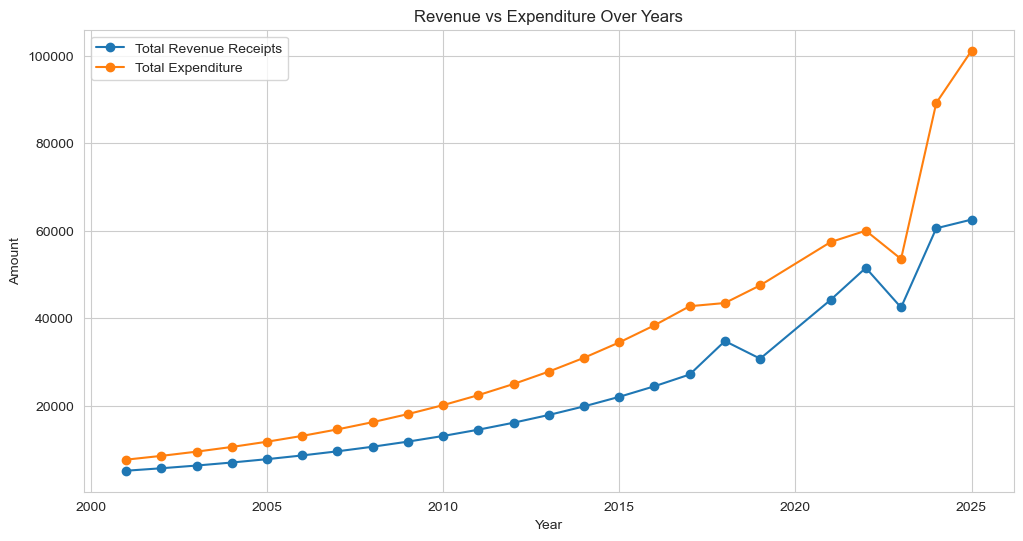

In [41]:
plt.figure(figsize=(12,6))

plt.plot(df['YEAR'], df['TOTAL REVENUE RECIEPTS'], marker='o', label='Total Revenue Receipts')
plt.plot(df['YEAR'], df['TOTAL EXPENDITURE'], marker='o', label='Total Expenditure')

plt.title("Revenue vs Expenditure Over Years")
plt.xlabel("Year")
plt.ylabel("Amount")
plt.legend()
plt.grid(True)
plt.show()


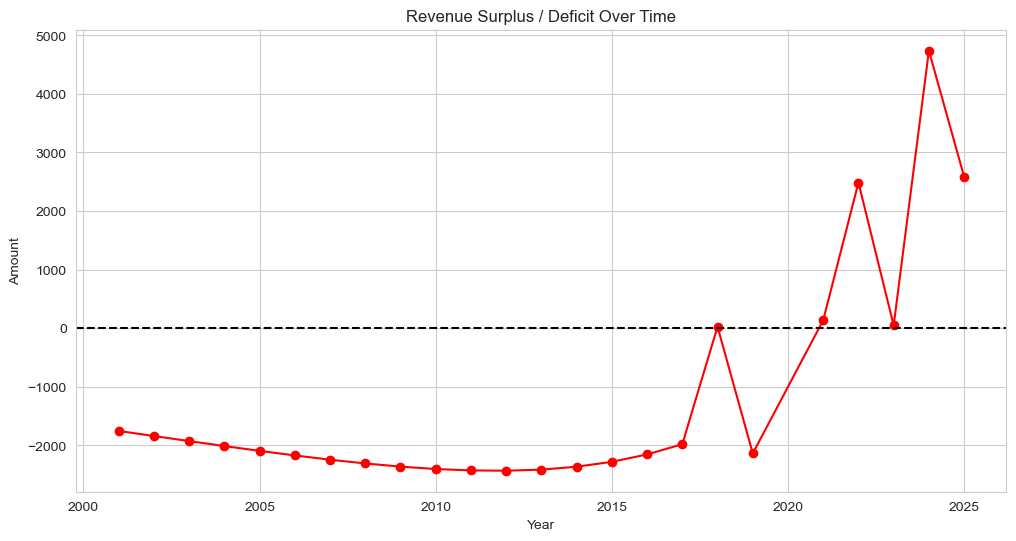

In [42]:
plt.figure(figsize=(12,6))
plt.plot(df['YEAR'], df['REVENUE SURPLUS/DEFICIT'], marker='o', color='red')
plt.axhline(0, color='black', linestyle='--')

plt.title("Revenue Surplus / Deficit Over Time")
plt.xlabel("Year")
plt.ylabel("Amount")
plt.grid(True)
plt.show()


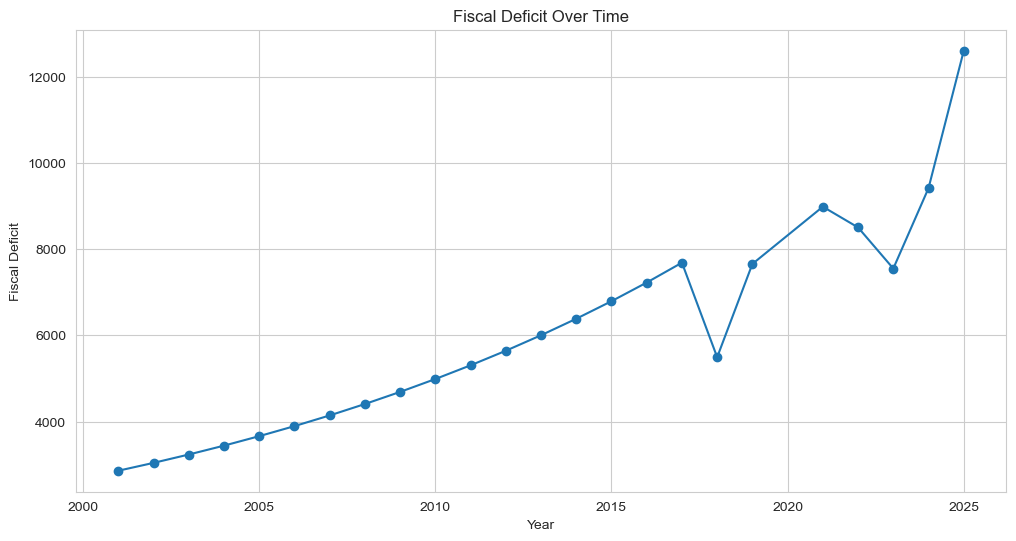

In [43]:
plt.figure(figsize=(12,6))
plt.plot(df['YEAR'], df['FISCAL DEFICIT'], marker='o')
plt.title("Fiscal Deficit Over Time")
plt.xlabel("Year")
plt.ylabel("Fiscal Deficit")
plt.grid(True)
plt.show()


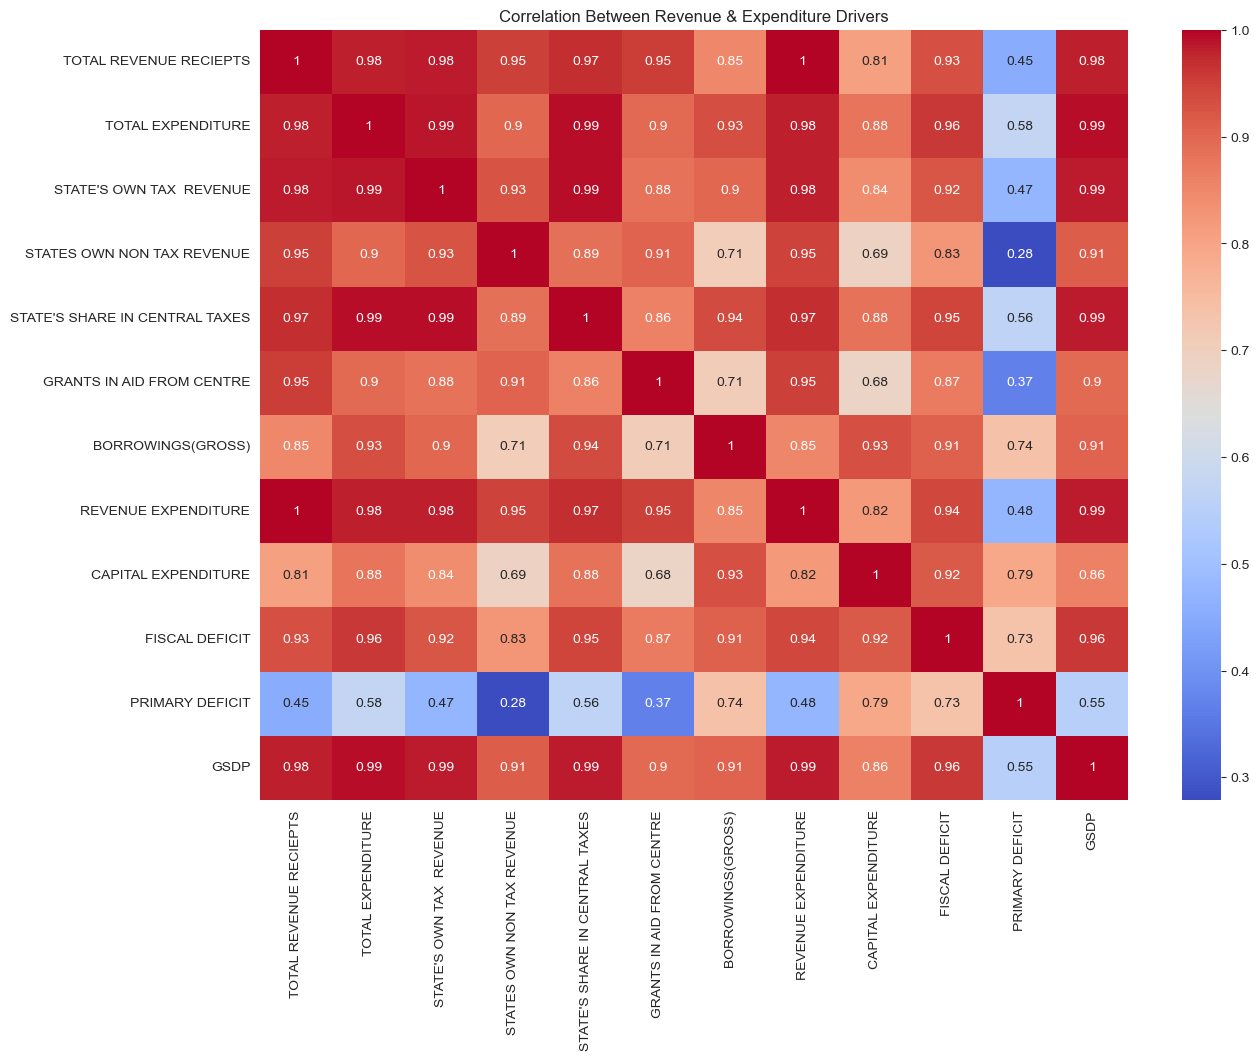

In [44]:
important_cols = [
    'TOTAL REVENUE RECIEPTS',
    'TOTAL EXPENDITURE',
    "STATE'S OWN TAX  REVENUE",
    'STATES OWN NON TAX REVENUE',
    'STATE\'S SHARE IN CENTRAL TAXES',
    'GRANTS IN AID FROM CENTRE',
    'BORROWINGS(GROSS)',
    'REVENUE EXPENDITURE',
    'CAPITAL EXPENDITURE',
    'FISCAL DEFICIT',
    'PRIMARY DEFICIT',
    'GSDP'
]

corr = df[important_cols].corr()

plt.figure(figsize=(14,10))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title("Correlation Between Revenue & Expenditure Drivers")
plt.show()


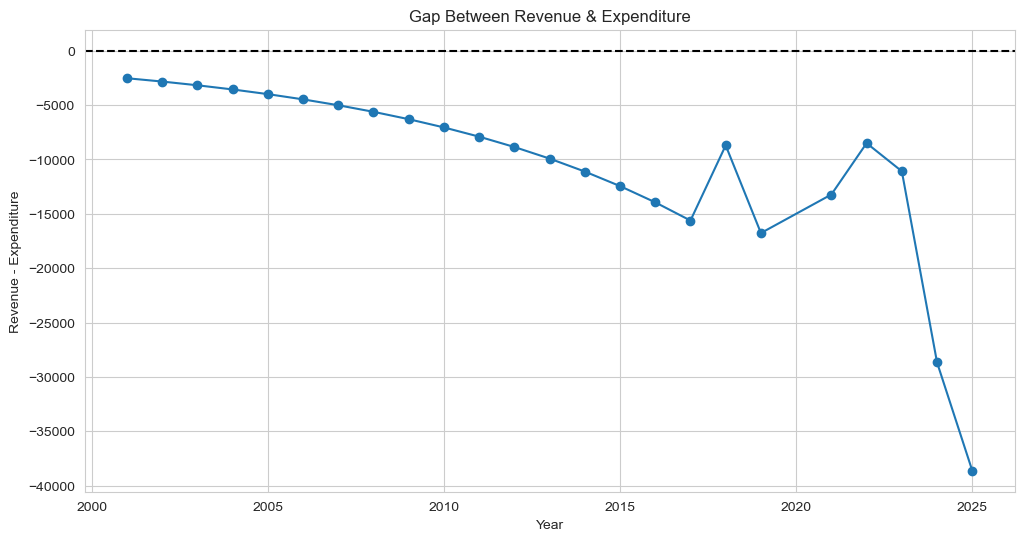

In [45]:
df['GAP'] = df['TOTAL REVENUE RECIEPTS'] - df['TOTAL EXPENDITURE']

plt.figure(figsize=(12,6))
plt.plot(df['YEAR'], df['GAP'], marker='o')
plt.axhline(0, color='black', linestyle='--')
plt.title("Gap Between Revenue & Expenditure")
plt.xlabel("Year")
plt.ylabel("Revenue - Expenditure")
plt.grid(True)
plt.show()
